In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

## 어떤 클래스로 분류되었는지 뿐만 아니라 그 클래스일 확률이 얼마인지 알 수 있다.

# 결정함수

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X,y = make_circles(noise=0.25, factor=0.5, random_state=1)
print("X shape :", X.shape)
print('y shape :', y.shape)
print("target :", np.unique(y))

X shape : (100, 2)
y shape : (100,)
target : [0 1]


In [9]:
y_named = np.array(['blue', 'red'])[y]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

In [11]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [12]:
print("X_test shape :", X_test.shape)
print("결정 함수 결과 형태 :", gbrt.decision_function(X_test).shape)

X_test shape : (25, 2)
결정 함수 결과 형태 : (25,)


In [15]:
# 양수 일수록 클래스가 1로 분류될 확률높다는 것을 의미
print(gbrt.decision_function(X_test)[:6])

[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [16]:
print("임계치와 결정 함수 결과 비교 : \n", gbrt.decision_function(X_test) > 0)
print("예측 :\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교 : 
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측 :
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [24]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]

In [25]:
print("Pred는 예측 결과와 같다 :", np.all(pred == gbrt.predict(X_test)))

Pred는 예측 결과와 같다 : True


In [29]:
# decision function 의 값은 데이터의 scale 과 모델 파라미터에 따라서 달라진다.
decision_function = gbrt.decision_function(X_test)

print(f"Max(decision_function) : {np.max(decision_function)}\nMin(decision_function) : {np.min(decision_function)}")

Max(decision_function) : 4.289866423997604
Min(decision_function) : -7.690971785101899


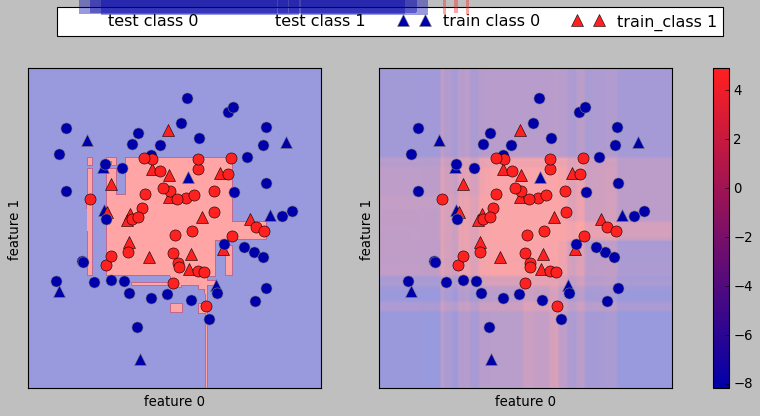

In [45]:
# 그래프 색(decision_function의 값)이 진할수록 확신을 가지고 해당 클래스로 분류했다는 것을 의미한다.
fig, axes = plt.subplots(1,2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.4, cm=mglearn.ReBl)

for ax in axes :
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax, c=mglearn.cm2.colors)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax, c=mglearn.cm2.colors)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0", "train_class 1"], loc = (0.1, 1.1), ncol = 4)

# 예측 확률

In [47]:
print("확률 값의 형태 : ", gbrt.predict_proba(X_test).shape)

확률 값의 형태 :  (25, 2)


In [48]:
print("예측 확률 : \n", gbrt.predict_proba(X_test)[:6])

예측 확률 : 
 [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


### [여러 모델의 예측 확률](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

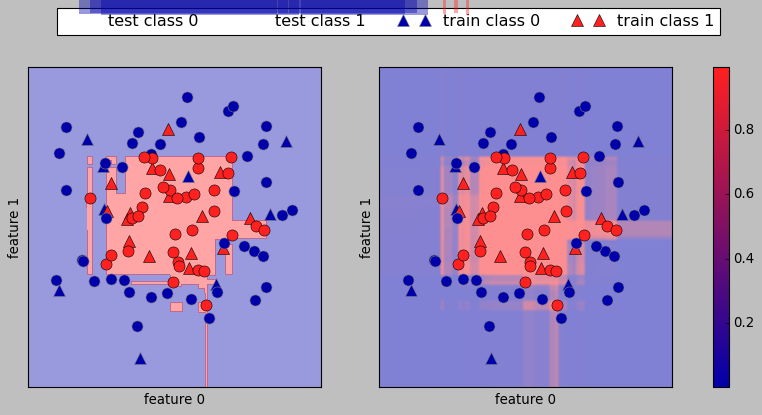

In [57]:
fig, axes = plt.subplots(1,2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.5, 
                                            cm=mglearn.ReBl, function="predict_proba")

for ax in axes :
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax, c=mglearn.cm2.colors)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax, c=mglearn.cm2.colors)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0", "train class 1"], loc = (0.1, 1.1), ncol = 4)
plt.show()

## 다중 분류에서의 불확실성

In [58]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [63]:
# 결정 함수의 결과는 (n_samples, n_classes) 의 형태를 가진다.
print("결정 함수의 결과 형태 :", gbrt.decision_function(X_test).shape)
print("결정 함수의 결과 :\n", gbrt.decision_function(X_test)[:6])

결정 함수의 결과 형태 : (38, 3)
결정 함수의 결과 :
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [66]:
print("가장 큰 결정 함수의 인덱스 : \n", np.argmax(gbrt.decision_function(X_test), axis = 1))
print('예측 : \n', gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스 : 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측 : 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [68]:
print("예측 확률 : \n", gbrt.predict_proba(X_test)[:6])
print("합 : ", gbrt.predict_proba(X_test).sum(axis=1)[:6])

예측 확률 : 
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
합 :  [1. 1. 1. 1. 1. 1.]


In [70]:
print("가장 큰 예측 확률의 인덱스 :\n", np.argmax(gbrt.predict_proba(X_test), axis = 1))
print("예측 : \n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스 :
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측 : 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [75]:
argmax_predict_proba = np.argmax(gbrt.predict_proba(X_test), axis = 1)
iris.target_names[argmax_predict_proba]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype='<U10')